In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
from datetime import datetime, date
from os import path
import os
import sys

import keras
from keras.callbacks import EarlyStopping
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from sklearn.model_selection import train_test_split
# Any results you write to the current directory are saved as output.

### prepare the data

In [2]:
df = pd.read_csv('cohort_preprocessed.csv')
df

,GRID,GENDER,Race_B,Race_W,AGE,DURATION_BF2007,Smoking,MAX_BMI_missing,MAX_VALUE_Chol_missing,MAX_VALUE_Creat_missing,...,CNT_MedCode_83367_2005,CNT_MedCode_83367_2006,CNT_MedCode_836_2000,CNT_MedCode_836_2001,CNT_MedCode_836_2002,CNT_MedCode_836_2003,CNT_MedCode_836_2004,CNT_MedCode_836_2005,CNT_MedCode_836_2006,Class
0,R247513794,1,0,1,59,5411,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,R239544414,0,0,1,47,397,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,R215940379,1,0,1,51,2738,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,R230872807,0,1,0,28,489,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,R227723582,1,0,1,41,1093,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109485,R294670944,1,0,1,57,853,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
109486,R249681098,1,1,0,25,1078,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
109487,R262016973,1,0,1,41,3334,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
109488,R208290840,1,0,1,50,3472,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
y = df.Class.values
X = df.drop(['GRID','Class'], axis=1)
X.shape

(109490, 531)

In [4]:
def split_by_trait_no_protected_trait (X, y, attribute, random_state):
    df_train, df_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    #separate the test sets by the trait (attribute) we want
    y_test_1 = y_test[df_test[attribute]==1]
    y_test_2 = y_test[df_test[attribute]==0]
    
    df_test_1 = df_test[df_test[attribute]==1]    
    df_test_2 = df_test[df_test[attribute]==0]
    
    #exclude or not the protected attribute
    #X_train = df_train.drop([attribute], axis=1).values
    #X_test = df_test.drop([attribute], axis=1).values
    
    return df_train, y_train, df_test, y_test, df_test_1, df_test_2, y_test_1, y_test_2

In [129]:
X_train, y_train, X_test, y_test, X_test_female, X_test_male, y_test_female, y_test_male = split_by_trait_no_protected_trait(X,y,"GENDER",4)
X_train, y_train, X_test, y_test, X_test_white, X_test_black, y_test_white, y_test_black = split_by_trait_no_protected_trait(X,y,"Race_W",4)


In [130]:
my_dict = dict(y_test = y_test, 
               y_test_female = y_test_female, 
               y_test_male = y_test_male,
               y_test_white = y_test_white, 
               y_test_black = y_test_black)
overall_prediction = pd.DataFrame.from_dict(my_dict, orient='index')
overall_prediction = overall_prediction.transpose()

print(overall_prediction.head())
from google.colab import drive
drive.mount('/content/drive')

overall_prediction.to_csv('/content/drive/My Drive/Colab Notebooks/LSTM result_4.csv', index=False)

   y_test  y_test_female  y_test_male  y_test_white  y_test_black
0     0.0            0.0          0.0           0.0           0.0
1     0.0            0.0          0.0           0.0           0.0
2     0.0            0.0          0.0           0.0           0.0
3     0.0            0.0          0.0           0.0           0.0
4     0.0            0.0          1.0           0.0           0.0
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
#X = X.to_numpy()

#split data into train and test dataset (80%/20%)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=421)
#print('X_train num',X_train.shape[0])
#print('X_test num',X_test.shape[0])

In [132]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
print('X_train num',X_train.shape[0])
print('X_test num',X_test.shape[0])

X_train num 87592
X_test num 21898


In [133]:
time_feature_beg=13  # temporal feature start position
X_train_time = X_train[:,time_feature_beg:]
X_test_time = X_test[:,time_feature_beg:]
X_train_aux = X_train[:,0:time_feature_beg]
X_test_aux = X_test[:,0:time_feature_beg]
print(X_train_time.shape)
print(X_test_time.shape)
print(X_train_aux.shape)
print(X_test_aux.shape)

(87592, 518)
(21898, 518)
(87592, 13)
(21898, 13)


In [134]:
# split the male/female test set
X_test_male = X_test_male.to_numpy()
X_test_male_time = X_test_male[:,time_feature_beg:]
X_test_male_aux = X_test_male[:,0:time_feature_beg]
print(X_test_male_time.shape)
print(X_test_male_aux.shape)

X_test_female = X_test_female.to_numpy()
X_test_female_time = X_test_female[:,time_feature_beg:]
X_test_female_aux = X_test_female[:,0:time_feature_beg]
print(X_test_female_time.shape)
print(X_test_female_aux.shape)

(7759, 518)
(7759, 13)
(14139, 518)
(14139, 13)


In [135]:
# split the white/black test set
X_test_white = X_test_white.to_numpy()
X_test_white_time = X_test_white[:,time_feature_beg:]
X_test_white_aux = X_test_white[:,0:time_feature_beg]
print(X_test_white_time.shape)
print(X_test_white_aux.shape)

X_test_black = X_test_black.to_numpy()
X_test_black_time = X_test_black[:,time_feature_beg:]
X_test_black_aux = X_test_black[:,0:time_feature_beg]
print(X_test_black_time.shape)
print(X_test_black_aux.shape)

(19009, 518)
(19009, 13)
(2889, 518)
(2889, 13)


In [136]:
def case_contro_ratio(y):
    num_of_case = y[y==1].shape[0]
    num_of_control = y[y==0].shape[0]
    ratio = num_of_control/num_of_case
    return ratio, num_of_case, num_of_control

In [137]:
print('train ratio %.2f, case %d, control %d ' % (case_contro_ratio(y_train)[0], case_contro_ratio(y_train)[1],case_contro_ratio(y_train)[2]))
# print('valid cohort ratio %.2f, case %d, control %d'% (case_contro_ratio(y_valid)[0], case_contro_ratio(y_valid)[1],case_contro_ratio(y_valid)[2]))
print('test cohort ratio %.2f case %d, control %d' % (case_contro_ratio(y_test)[0],case_contro_ratio(y_test)[1],case_contro_ratio(y_test)[2]))

train ratio 10.09, case 7901, control 79691 
test cohort ratio 10.39 case 1923, control 19975


### train the model

In [138]:
# reshape the temporal features
def reshape_time_series(X, time_steps, feature_size):  
    X_new = np.zeros(shape=(X.shape[0],X.shape[1]))
    idx=0
    for i in range(time_steps):
        for j in range(feature_size):
            X_new[:,idx] = X[:,i+j*time_steps]
            idx+=1
    return X_new

In [139]:
X_train_time_new = reshape_time_series(X_train_time,time_steps=7,feature_size=74) #74 distinct features
X_train_time_new.shape

(87592, 518)

In [140]:
X_test_time_new = reshape_time_series(X_test_time,7,74)
X_test_time_new.shape

(21898, 518)

In [141]:
X_test_male_new = reshape_time_series(X_test_male_time,time_steps=7,feature_size=74) #74 distinct features
X_test_male_new.shape

(7759, 518)

In [142]:
X_test_female_new = reshape_time_series(X_test_female_time,time_steps=7,feature_size=74) #74 distinct features
X_test_female_new.shape

(14139, 518)

In [143]:
X_test_white_new = reshape_time_series(X_test_white_time,time_steps=7,feature_size=74) #74 distinct features
X_test_white_new.shape
X_test_black_new = reshape_time_series(X_test_black_time,time_steps=7,feature_size=74) #74 distinct features
X_test_black_new.shape

(2889, 518)

In [144]:
feature_list = [str(i) for i in range(2000,2006)] # years
feature_list

['2000', '2001', '2002', '2003', '2004', '2005']

In [145]:
# reshape input to be 3D [samples, timesteps, features]
timesteps=7
X_train_time = X_train_time_new.reshape((X_train_time_new.shape[0], timesteps, int(X_train_time_new.shape[1]/timesteps)))
X_test_time = X_test_time_new.reshape((X_test_time_new.shape[0], timesteps, int(X_test_time_new.shape[1]/timesteps)))
print(X_train_time.shape)
print(X_test_time.shape)

(87592, 7, 74)
(21898, 7, 74)


In [146]:
X_test_male_time = X_test_male_new.reshape((X_test_male_new.shape[0], timesteps, int(X_test_male_new.shape[1]/timesteps)))
print(X_test_male_time.shape)

(7759, 7, 74)


In [147]:
X_test_female_time = X_test_female_new.reshape((X_test_female_new.shape[0], timesteps, int(X_test_female_new.shape[1]/timesteps)))
X_test_white_time = X_test_white_new.reshape((X_test_white_new.shape[0], timesteps, int(X_test_white_new.shape[1]/timesteps)))
X_test_black_time = X_test_black_new.reshape((X_test_black_new.shape[0], timesteps, int(X_test_black_new.shape[1]/timesteps)))


In [148]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential
# Import `Dense` from `keras.layers`
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

In [149]:
main_input = Input(shape=(X_train_time.shape[1], X_train_time.shape[2]), name='main_input')
lstm_out = LSTM(84, dropout=0.1, recurrent_dropout=0.1)(main_input)

# lstm_out = LSTM(84)(main_input)
auxiliary_output = Dense(1, activation='sigmoid', name='aux_output')(lstm_out)

auxiliary_input = Input(shape=(time_feature_beg,), name='aux_input')
x = keras.layers.concatenate([lstm_out, auxiliary_input])

# We stack a deep densely-connected network on top
x = Dense(8, activation='relu')(x)
x= Dropout(0.1)(x)
x = Dense(8, activation='relu')(x)
x= Dropout(0.1)(x)

# And finally we add the main logistic regression layer
main_output = Dense(1, activation='sigmoid', name='main_output')(x)
#This defines a model with two inputs and two outputs:
model = Model(inputs=[main_input, auxiliary_input], outputs=[main_output, auxiliary_output])

In [150]:
# Model output shape
model.output_shape
# Model summary
model.summary()
# Model config
model.get_config()
# List all weight tensors 
model.get_weights()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 main_input (InputLayer)        [(None, 7, 74)]      0           []                               
                                                                                                  
 lstm_4 (LSTM)                  (None, 84)           53424       ['main_input[0][0]']             
                                                                                                  
 aux_input (InputLayer)         [(None, 13)]         0           []                               
                                                                                                  
 concatenate_4 (Concatenate)    (None, 97)           0           ['lstm_4[0][0]',                 
                                                                  'aux_input[0][0]']        

[array([[-0.07791436, -0.03446981,  0.08315729, ...,  0.0292355 ,
          0.01495225, -0.04085445],
        [ 0.00753356, -0.02577709,  0.07867276, ...,  0.10936301,
         -0.01489857,  0.08289137],
        [ 0.02351733,  0.04874704,  0.05765709, ..., -0.07971793,
          0.07176132,  0.00019993],
        ...,
        [ 0.09549028,  0.11288931, -0.11089328, ..., -0.0367078 ,
         -0.11498023,  0.00809935],
        [ 0.00534899,  0.04284524, -0.09994856, ..., -0.06423136,
         -0.02061301,  0.10730682],
        [ 0.07822091,  0.0672041 ,  0.05086298, ..., -0.05669096,
         -0.07531822,  0.02580302]], dtype=float32),
 array([[ 0.02030647, -0.06293783, -0.01836096, ..., -0.07105629,
          0.07164036, -0.04781408],
        [ 0.02689951,  0.05491722,  0.06607869, ...,  0.02761736,
          0.04822029,  0.12766488],
        [ 0.0050455 , -0.02465623, -0.02658033, ...,  0.0378285 ,
          0.02970145, -0.06523406],
        ...,
        [ 0.00712143, -0.07947881,  0.0

In [151]:
import keras.backend as K
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint, EarlyStopping
from keras.optimizers import RMSprop
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)


# class_weight = {0 : 1., 1: 7.}
opt = RMSprop(lr=0.0001) #0.01 - 0.001
model.compile(optimizer=opt,
              loss={'main_output': 'binary_crossentropy', 'aux_output': 'binary_crossentropy'},
              loss_weights={'main_output': 1., 'aux_output': 0.5},metrics=['accuracy',mean_pred])
# callback_early_stopping = [EarlyStopping(monitor='val_loss', patience=10,verbose=0, mode='auto')]
# And trained it via:
reduce_lr = ReduceLROnPlateau(monitor='val_main_output_loss', factor=0.9, patience=30, min_lr=0.000001, verbose=1)
checkpointer = ModelCheckpoint(filepath='lstm.hdf5', verbose=1, save_best_only=True)

#earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')

#history = model.fit({'main_input': X_train_time, 'aux_input': X_train_aux},
#                                {'main_output': y_train, 'aux_output': y_train},
#                                callbacks=[checkpointer, earlyStopping], verbose=1,
#                                epochs=50, validation_split=0.11, batch_size=128)


history=model.fit({'main_input': X_train_time, 'aux_input': X_train_aux},
          {'main_output': y_train, 'aux_output': y_train},
          epochs=30, batch_size=128, callbacks=[reduce_lr, checkpointer],validation_split=0.11)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


609/610 [============================>.] - ETA: 0s - loss: 4.6892 - main_output_loss: 4.5315 - aux_output_loss: 0.3155 - main_output_accuracy: 0.8165 - main_output_mean_pred: 0.1427 - aux_output_accuracy: 0.9076 - aux_output_mean_pred: 0.1110
Epoch 1: val_loss improved from inf to 0.56449, saving model to lstm.hdf5
610/610 [==============================] - 29s 39ms/step - loss: 4.6890 - main_output_loss: 4.5312 - aux_output_loss: 0.3155 - main_output_accuracy: 0.8165 - main_output_mean_pred: 0.1426 - aux_output_accuracy: 0.9076 - aux_output_mean_pred: 0.1109 - val_loss: 0.5645 - val_main_output_loss: 0.4098 - val_aux_output_loss: 0.3094 - val_main_output_accuracy: 0.9066 - val_main_output_mean_pred: 0.0595 - val_aux_output_accuracy: 0.9066 - val_aux_output_mean_pred: 0.0983 - lr: 1.0000e-04
Epoch 2/30
608/610 [============================>.] - ETA: 0s - loss: 2.3156 - main_output_loss: 2.1654 - aux_output_loss: 0.3005 - main_output_accuracy: 0.8089 - main_output_mean_pred: 0.1510 - au

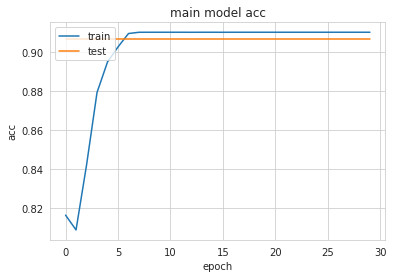

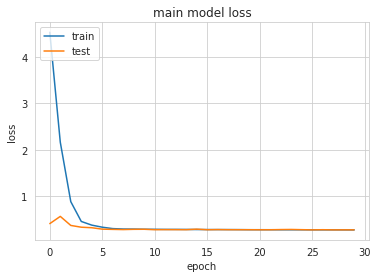

In [152]:
# summarize history for accuracy
plt.plot(history.history['main_output_accuracy'])
plt.plot(history.history['val_main_output_accuracy'])
plt.title('main model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['main_output_loss'])
plt.plot(history.history['val_main_output_loss'])
plt.title('main model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [153]:
model.load_weights('lstm.hdf5')
score = model.evaluate({'main_input': X_test_time, 'aux_input': X_test_aux},
          {'main_output': y_test, 'aux_output': y_test},verbose=0)
# loss and the accuracy.
print(score)

[0.4061521887779236, 0.2653875946998596, 0.2815297544002533, 0.9121837615966797, 0.09768795967102051, 0.9121837615966797, 0.1098475307226181]


### make predictions

In [154]:
y_score = model.predict({'main_input': X_test_time, 'aux_input': X_test_aux})
y_pred = y_score

685/685 [==============================] - 4s 5ms/step


In [155]:
y_score_male = model.predict({'main_input': X_test_male_time, 'aux_input': X_test_male_aux})
y_pred_male = y_score_male

y_score_female = model.predict({'main_input': X_test_female_time, 'aux_input': X_test_female_aux})
y_pred_female = y_score_female

y_score_white = model.predict({'main_input': X_test_white_time, 'aux_input': X_test_white_aux})
y_pred_white = y_score_white

y_score_black = model.predict({'main_input': X_test_black_time, 'aux_input': X_test_black_aux})
y_pred_black = y_score_black

91/91 [==============================] - 1s 6ms/step


In [156]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
def compute_roc(y_test,y_score,method):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = 2
    fpr, tpr, _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
    # Compute micro-average ROC curve and ROC area
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=method+' (AUC = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

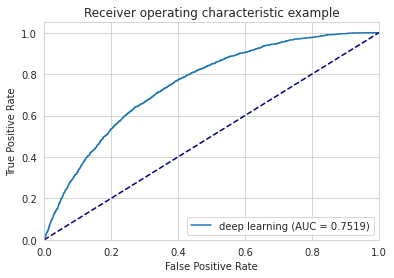

In [157]:
# main auc
compute_roc(y_test,y_score[0],'deep learning')

In [158]:
my_dict = dict(test_score = y_score[0].reshape(-1).tolist(), 
               test_male_score = y_score_male[0].reshape(-1).tolist(), 
               test_female_score = y_score_female[0].reshape(-1).tolist())
overall_prediction = pd.DataFrame.from_dict(my_dict, orient='index')
overall_prediction = overall_prediction.transpose()
print(overall_prediction.head())
from google.colab import drive
drive.mount('/content/drive')

#w = csv.writer(open('/content/drive/My Drive/Colab Notebooks/LSTM gender prediction2.csv', "w"))
#for key, val in my_dict.items():    
   # w.writerow([key, val])

overall_prediction.to_csv('/content/drive/My Drive/Colab Notebooks/LSTM gender prediction_4.csv', index=False)


   test_score  test_male_score  test_female_score
0    0.228477         0.203210           0.228477
1    0.102147         0.119399           0.102147
2    0.152855         0.029525           0.152855
3    0.209434         0.074922           0.209434
4    0.203210         0.251536           0.124800
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [159]:
my_dict_2 = dict(test_score = y_score[0].reshape(-1).tolist(), 
                 test_white_score = y_score_white[0].reshape(-1).tolist(), 
                 test_black_score = y_score_black[0].reshape(-1).tolist())
overall_prediction_2 = pd.DataFrame.from_dict(my_dict_2, orient='index')
overall_prediction_2 = overall_prediction_2.transpose()

#w = csv.writer(open('/content/drive/My Drive/Colab Notebooks/LSTM race prediction2.csv', "w"))
#for key, val in my_dict_2.items():
#    w.writerow([key, val])

overall_prediction_2.to_csv('/content/drive/My Drive/Colab Notebooks/LSTM race prediction_4.csv', index=False)
